## Import Library dan Dataset

In [2]:
import pandas as pd
import numpy as np
#from ydata_profiling import ProfileReport

df = pd.read_csv('star_classification.csv')
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [3]:
df.shape

(100000, 18)

In [4]:
# Melihat data NaN
df.isna().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [5]:
# Melihat Tipe Data

df.dtypes

obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

In [6]:
# Melihat Hasil Output

df['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [7]:
df['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

## Membuat Grafik Data Output

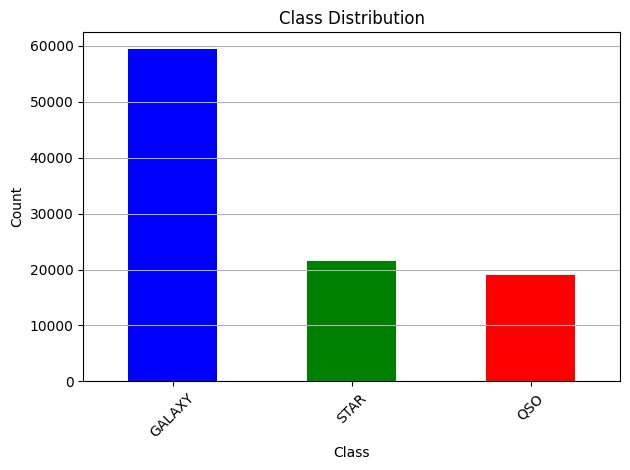

In [8]:
import matplotlib.pyplot as plt

# Get the value counts from the 'class' column
class_counts = df['class'].value_counts()

# Define colors for each class
colors = ['blue', 'green', 'red']

# Plotting
fig, ax = plt.subplots()
class_counts.plot(kind='bar', ax=ax, color=colors)

# Customize the plot
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_title('Class Distribution')
ax.grid(True, axis='y')  # Add grid lines for clarity

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


In [9]:
# Menggunakan ydata_profiling untuk melihat korelasi

#profile = ProfileReport(df,title="Star Profile Report")
#profile

## Data Cleaning dan Transformasi

In [10]:
# Menghapus kolom yang tidak digunakan

df = df.drop(columns = ['obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'fiber_ID'], axis=1)

In [11]:
odd = df.loc[df['u'] == -9999]
odd

,alpha,delta,u,g,r,i,z,spec_obj_ID,class,redshift,plate,MJD
79543,224.006526,-0.624304,-9999.0,-9999.0,18.1656,18.01675,-9999.0,3.731277e+18,STAR,0.000089,3314,54970


In [12]:
# Menghapus baris dengan data yang tidak dipakai

df = df.drop(df.index[79543], axis=0)
df.shape

(99999, 12)

In [13]:
df = df.reset_index(drop=True)

## Data Preparation

In [14]:
# Membagi data menjadi data train dan data test

df_train = df.sample(frac=0.9, random_state=25)
df_test = df.drop(df_train.index)
print(df_train.shape)
print(df_test.shape)

(89999, 12)
(10000, 12)


In [15]:
# Membagi data menjadi data train dan data validasi

df_train1 = df_train.sample(frac=0.8, random_state=20)
df_val = df_train.drop(df_train1.index)
print(df_train1.shape)
print(df_val.shape)

(71999, 12)
(18000, 12)


In [16]:
# Merubah output menjadi interger

t = {'GALAXY':0,'QSO':1,'STAR':2}

In [17]:
# Menghapus class string dengan interger

df_train['class_enc'] = df_train['class'].map(t)
df_val['class_enc'] = df_val['class'].map(t)
df_train.head()

,alpha,delta,u,g,r,i,z,spec_obj_ID,class,redshift,plate,MJD,class_enc
94457,172.427892,18.790452,24.64223,22.25799,21.90783,21.04677,20.68865,6.619268e+18,STAR,0.000381,5879,56047,2
20973,162.876293,31.838297,22.36357,21.53171,21.15401,21.03201,20.55818,7.256622e+18,QSO,2.147799,6445,56366,1
42832,54.185294,0.977728,21.11077,18.74387,17.50812,17.01411,16.77351,8.254125e+18,STAR,0.000081,7331,56658,2
1568,144.515185,31.113963,23.00851,22.65649,22.50306,22.07332,21.45145,1.176015e+19,GALAXY,0.832558,10445,58158,0
41003,331.238887,0.201204,22.90914,21.54735,21.17424,20.81643,20.60504,1.032006e+19,QSO,3.176916,9166,58051,1


In [18]:
df_train = df_train.drop(['class'],axis=1)
df_val = df_val.drop(['class'], axis=1)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [19]:
df_val.head()

,alpha,delta,u,g,r,i,z,spec_obj_ID,redshift,plate,MJD,class_enc
0,172.427892,18.790452,24.64223,22.25799,21.90783,21.04677,20.68865,6.619268e+18,0.000381,5879,56047,2
1,331.238887,0.201204,22.90914,21.54735,21.17424,20.81643,20.60504,1.032006e+19,3.176916,9166,58051,1
2,141.637279,42.088899,25.03010,23.79241,21.48902,20.47543,19.81643,9.342972e+18,0.595731,8298,57390,0
3,84.873591,-2.153757,21.72150,21.17631,19.22806,18.42299,17.82802,8.172984e+18,0.277057,7259,56603,0
4,321.649375,2.096375,21.25759,20.10503,20.81921,20.29224,19.06567,1.031569e+19,0.219943,9162,58040,0


In [20]:
df_test['class_enc'] = df_test['class'].map(t)
df_test = df_test.drop(columns=['class'],axis=1)

In [21]:
df_train['class_enc'].value_counts()

0    53547
2    19414
1    17038
Name: class_enc, dtype: int64

In [22]:
# Menggabungkan data df_train dengan df_val

df_com = pd.concat([df_train,df_val])
df_com.shape

(107999, 12)

In [23]:
# Data preprocessing 

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()

X = df_com.drop(columns=['class_enc'],axis=1)
y = df_com['class_enc']

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X)
X = pd.DataFrame(ss.transform(X))

from tensorflow.keras.utils import to_categorical

y_cat = to_categorical(y)

In [24]:
# Melakukan split data sebagai train data dan test data

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X.values,y_cat, test_size=0.2) 

In [25]:
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import RandomizedSearchCV

# Define your model architecture
model = keras.Sequential([
    keras.layers.Dense(33, activation="relu", input_shape=(11,)),
    keras.layers.Dense(3, activation="softmax")
])

In [26]:
# Compile model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0012946740543824272),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [27]:
# Train the model
model.fit(x_train, y_train, epochs=150, batch_size=512,
                    validation_data=(x_test, y_test),
                    callbacks=[EarlyStopping(patience=3)])

Epoch 1/150
169/169 [==============================] - 1s 4ms/step - loss: 0.7006 - accuracy: 0.7354 - val_loss: 0.4728 - val_accuracy: 0.8521
Epoch 2/150
169/169 [==============================] - 0s 2ms/step - loss: 0.3908 - accuracy: 0.8719 - val_loss: 0.3384 - val_accuracy: 0.8829
Epoch 3/150
169/169 [==============================] - 0s 2ms/step - loss: 0.2940 - accuracy: 0.9040 - val_loss: 0.2665 - val_accuracy: 0.9147
Epoch 4/150
169/169 [==============================] - 0s 2ms/step - loss: 0.2402 - accuracy: 0.9259 - val_loss: 0.2265 - val_accuracy: 0.9309
Epoch 5/150
169/169 [==============================] - 0s 2ms/step - loss: 0.2089 - accuracy: 0.9362 - val_loss: 0.2018 - val_accuracy: 0.9387
Epoch 6/150
169/169 [==============================] - 0s 2ms/step - loss: 0.1892 - accuracy: 0.9431 - val_loss: 0.1867 - val_accuracy: 0.9437
Epoch 7/150
169/169 [==============================] - 0s 2ms/step - loss: 0.1761 - accuracy: 0.9474 - val_loss: 0.1755 - val_accuracy: 0.9457

## Menyimpan Model dan Melakukan Prediksi pada Data Baru

In [28]:
import tensorflow as tf
# Save the model
model.save('model.h5')

In [29]:
# Load the model
import tensorflow as tf

loaded_model = tf.keras.models.load_model('model.h5')

In [30]:
import pandas as pd

df = pd.read_csv('data.csv')
df.head()

,alpha,delta,u,g,r,i,z,spec_obj_ID,redshift,plate,MJD
0,135.689107,32.494632,23.87882,23.87882,20.39501,19.16573,18.79371,6.619268e+18,0.000381,5879,56047


In [31]:
predictions = loaded_model.predict(df)

1/1 [==============================] - 0s 76ms/step


In [32]:
import numpy as np

output_probabilities =loaded_model.predict(df)
predicted_class = np.argmax(output_probabilities)

1/1 [==============================] - 0s 21ms/step


In [33]:
print(predicted_class)

1


In [34]:
import joblib
joblib.dump(ss, 'scaling.pkl')

['scaling.pkl']

## Mencoba Lagi

In [35]:
test_x = df_test.drop(columns=['class_enc'],axis=1)
test_y = df_test[['class_enc']]

test_x = ss.transform(test_x)

pred = model.predict(test_x)
pred

313/313 [==============================] - 0s 861us/step


array([[9.8616147e-01, 1.3838493e-02, 2.6619902e-12],
       [9.2877895e-01, 7.1221016e-02, 5.4012814e-23],
       [9.9084586e-01, 9.1541037e-03, 3.2184596e-14],
       ...,
       [3.4123198e-03, 9.9658763e-01, 0.0000000e+00],
       [1.0746468e-01, 8.9253527e-01, 1.6909696e-17],
       [9.9724674e-01, 2.7533418e-03, 2.7934923e-20]], dtype=float32)

In [36]:
sd=[]
for i in range(len(pred)):
    sd.append(np.argmax(pred[i]))

In [37]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_y, sd)
print("Accuracy Score:", accuracy)


Accuracy Score: 0.9687


## Grafik Model Loss

In [38]:
history = model.history.history
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

KeyError: 'loss'

## Grafik Akurasi Model


In [40]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

KeyError: 'accuracy'

## Validasi skor ROC untuk setiap kelas

In [39]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    plt.figure(figsize=(15, 5))  # menyesuaikan ukuran figure
    for (idx, c_label) in enumerate(['GALAXY', 'QSO', 'STAR']): 
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        auc_score = auc(fpr, tpr)
        plt.subplot(1, 3, idx+1)
        plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC for class {}'.format(c_label))
        plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

multiclass_roc_auc_score(np.argmax(y_test, axis=1), pred_classes)

NameError: name 'pred_classes' is not defined

## Heatmap

675/675 [==============================] - 1s 2ms/step


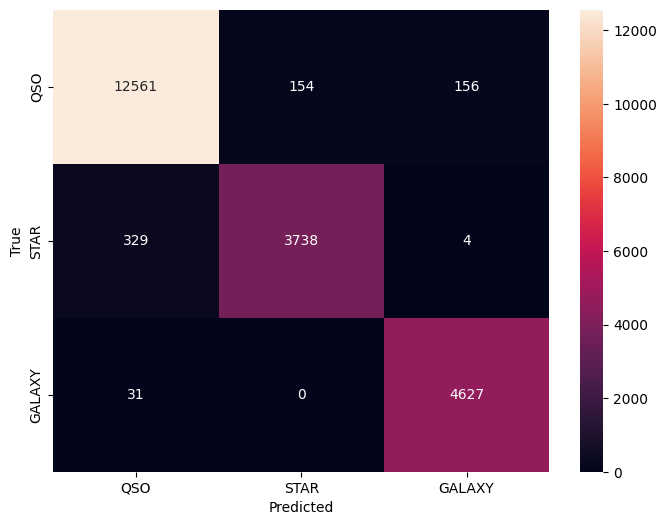

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Menggunakan model untuk memprediksi data test
pred = model.predict(x_test)
pred_classes = np.argmax(pred, axis=1)

class_labels = ['QSO', 'STAR', 'GALAXY']
cm = confusion_matrix(np.argmax(y_test, axis=1), pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
